In [1]:
"""
Created on Tue Apr 18 15:40:35 2023

@author: cb2409
"""
from io import StringIO

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def use_nice_dates(ax=None):
    import matplotlib.dates as mdates
    import matplotlib.pyplot as plt

    ax = ax or plt.gca()

    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)


data = """
Start Date	Completion Date	Delay	Total Time (Days)	Total Time - Delays
Cambridge	06/12/2021	04/07/2022	0	210	210
Oxford	04/04/2022	17/10/2022	63	196	133
Birmingham	23/05/2022	27/07/2022	0	65	65
RAL	01/09/2022	20/10/2022	20	49	29
"""

data = pd.read_table(StringIO(data))

In [2]:

data["Start Date"] = data["Start Date"].apply(
    lambda s: pd.to_datetime(s, dayfirst=True)
)
data["Completion Date"] = data["Completion Date"].apply(
    lambda s: pd.to_datetime(s, dayfirst=True)
)

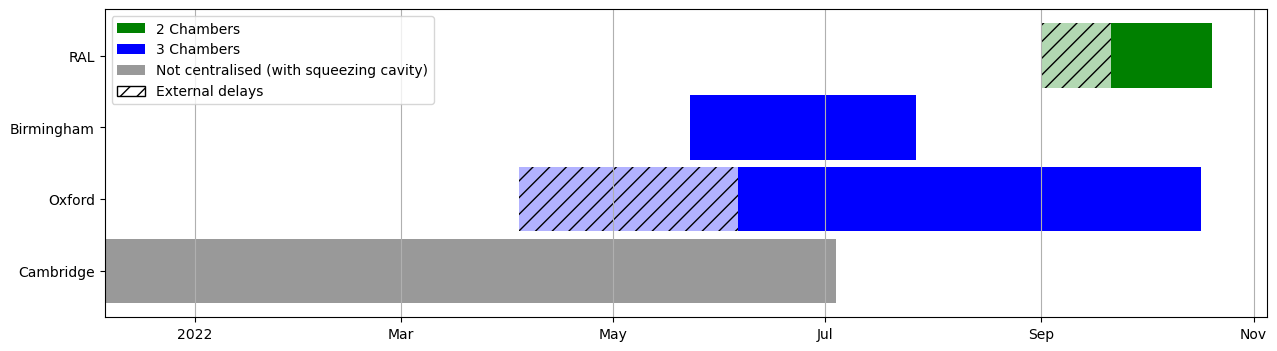

In [3]:

plt.figure(figsize=(15, 4))
plt.grid(True, zorder=-1000, axis="x")

HATCH_STYLE = "//"

colors = ["#999"] + ["b", "b", "g", "g"]
handles = []

for (i, institute), color in zip(enumerate(data.index), colors):
    start = data.loc[institute, "Start Date"]
    end = data.loc[institute, "Completion Date"]
    delays = data.loc[institute, "Delay"] * np.timedelta64(1, "D")

    plt.barh(
        i,
        left=start,
        width=delays,
        color=color,
        alpha=0.3,
        hatch=HATCH_STYLE,
        height=0.9,
    )

    handles.append(
        plt.barh(
            i,
            left=start + delays,
            width=end - start - delays,
            color=color,
            alpha=1,
            height=0.9,
        )
    )

plt.yticks(ticks=range(len(data)), labels=data.index)
use_nice_dates()


hatched_patch = mpatches.Patch(facecolor="white", edgecolor="black", hatch=HATCH_STYLE)

plt.legend(
    [handles[3], handles[1], handles[0], hatched_patch],
    [
        "2 Chambers",
        "3 Chambers",
        "Not centralised (with squeezing cavity)",
        "External delays",
    ],
)

plt.savefig("sidearm-build-timeline.pdf")

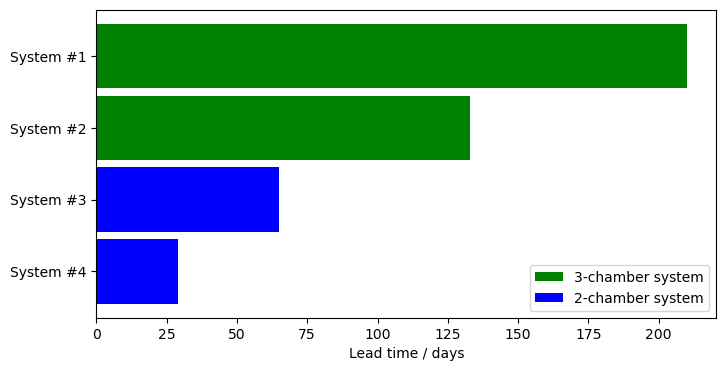

In [4]:

plt.figure(figsize=(8, 4))
# plt.grid(True, zorder=-1000, axis="x")

colors = ["b", "b", "g", "g"]

handles = []

institutes = list(reversed(data.index))

for (i, institute), color in zip(enumerate(institutes), colors):
    start = data.loc[institute, "Start Date"]
    end = data.loc[institute, "Completion Date"]
    delays = data.loc[institute, "Delay"] * np.timedelta64(1, "D")

    handles.append(
        plt.barh(
            i,
            width=(end - start - delays) / np.timedelta64(1, "D"),
            color=color,
            height=0.9,
        )
    )


plt.legend(
    [handles[2], handles[0]],
    [
        "3-chamber system",
        "2-chamber system",
    ],
)

plt.yticks(
    ticks=range(len(institutes)),
    labels=[
        "System #4",
        "System #3",
        "System #2",
        "System #1",
    ],
)
plt.xlabel("Lead time / days")

plt.savefig("sidearm-build-bars.pdf")